<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Soluzioni" data-toc-modified-id="Soluzioni-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Soluzioni</a></span><ul class="toc-item"><li><span><a href="#Prima-Parte---Teoria" data-toc-modified-id="Prima-Parte---Teoria-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Prima Parte - Teoria</a></span></li><li><span><a href="#Seconda-Parte---Pratica" data-toc-modified-id="Seconda-Parte---Pratica-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Seconda Parte - Pratica</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Data Cleaning</a></span></li><li><span><a href="#Data-Pre-Processing" data-toc-modified-id="Data-Pre-Processing-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Data Pre-Processing</a></span><ul class="toc-item"><li><span><a href="#Encoding" data-toc-modified-id="Encoding-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Encoding</a></span></li></ul></li><li><span><a href="#Model-Implementation" data-toc-modified-id="Model-Implementation-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Model Implementation</a></span><ul class="toc-item"><li><span><a href="#Anche-se-non-richiesto-dall'esercizio-qui-c'è-un-possibile-modello-di-machine-learning-su-cui-riflettere" data-toc-modified-id="Anche-se-non-richiesto-dall'esercizio-qui-c'è-un-possibile-modello-di-machine-learning-su-cui-riflettere-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Anche se non richiesto dall'esercizio qui c'è un possibile modello di machine learning su cui riflettere</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Decision Tree</a></span><ul class="toc-item"><li><span><a href="#Evaluate-DS-Model" data-toc-modified-id="Evaluate-DS-Model-1.6.2.1"><span class="toc-item-num">1.6.2.1&nbsp;&nbsp;</span>Evaluate DS Model</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Soluzioni 

Pratica individuale - Lezione 4

## Prima Parte - Teoria


-------------------------------------------------------------------------------------------------------
**Domanda 1.** Se dovessi creare un modello di classificazione binaria a partire da un dataset avente tale distribuzione delle classi, l'accuratezza potrebbe essere una buona metrica per valutare il tuo modello? Motiva la tua riposta.

![distro](distro.png)


**Risposta:** No, l'accuratezza non sarebbe una buona metrica perché il dataset è fortemente sbilanciato. Il risultato che si otterrebbe, fornirebbe un'indicazione della corretta classificazione o meno sulla base dell'esito della classe di maggioranza, andando ad oscurare la classe di minoranza. Non sarebbe quindi una metrica attendibile per una valutazione della bontà complessiva del modello. Sono indicate in questi casi le metriche precision e recall.

--------------------------------------------------------------------------------------------------------------------------------------


**Domanda 2.** La scalatura delle features influenza la costruzione di un albero decisionale? Motiva la tua risposta.

**Risposta:** No, perché l'albero prende delle decisioni sui nodi, ciascuno dei quali splitta il dataset in due porzioni a seconda della miglior coppia (feature,threshold). Quindi ciascuna decisione è influenzata da una singola feature, indipendentemente dalle altre.

I modelli basati sull'albero decisionale prendono decisioni sulla base di parametri.

Quindi se hai una variabile chiamata X, questa variabile può assumere più valori. Ora, in un modello di albero decisionale, un albero viene formato sulla base di micro decisioni che l'algoritmo prende per formare un albero. Un esempio di questa micro decisione potrebbe essere,

Se 50 > X > 100. (ci sono davvero due decisioni qui)

Se lo è, l'algoritmo forma un diverso ramo dell'albero di apprendimento, altrimenti forma un diverso ramo dell'albero.

Ora, se quei valori delle caratteristiche dovessero essere ridimensionati, diciamo di 100

0.5 > X/100 > 1 anche allora la decisione non sarebbe cambiata. Tieni presente che anche il valore di X è stato ridimensionato dello stesso fattore.

Pertanto, i modelli di alberi decisionali come Random forest, extratrees, XGboost ecc. Non richiedono il ridimensionamento dei valori delle funzionalità per convergere ai minimi.







## Seconda Parte - Pratica


-------------------------------------------------------------------------------------------------------------------------------------------

**Qui trovate un'analisi completa del dataset e con le diverse fasi viste finora nel master, per rispondere alle domande della pratica individuale non è necessario farle tutte!**

Il set di dati proviene da un sondaggio che misura gli atteggiamenti nei confronti della salute mentale e la frequenza dei disturbi di salute mentale nei luoghi di lavoro in compagnie *tech*.

Fonte: https://osmhhelp.org/research (anno 2014)




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier


## Exploratory Data Analysis

In [2]:
data = pd.read_csv("survey.csv")

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

**Obiettivo**: mi interessano le persone che lavorano in **compagnie tech**, quindi filtro il dataset sulla base di questa colonna.

In [6]:
data['tech_company'].value_counts()

Yes    1031
No      228
Name: tech_company, dtype: int64

In [7]:
data_tech = data[data['tech_company']=='Yes']
data_tech.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN


In [8]:
data = data_tech.drop(['tech_company'], axis=1)
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN


**Obiettivo**: andiamo ad ispezionare il contenuto delle colonne del dataset filtrato alla ricerca di valori anomali che facilmente potrebbero essere presenti in una survey.

In [9]:
data.Age.value_counts()

 32             71
 29             66
 26             66
 33             64
 27             63
 31             60
 28             57
 30             52
 34             52
 25             49
 35             42
 24             41
 23             39
 37             32
 36             30
 38             29
 40             26
 39             25
 43             21
 22             20
 41             17
 42             13
 21              9
 46              9
 45              9
 19              8
 44              6
 18              6
 50              6
 48              5
 20              5
 56              4
 51              4
 49              4
 57              3
 60              2
 54              2
 55              2
 47              2
 53              1
 11              1
 8               1
 61              1
 58              1
 5               1
 62              1
 99999999999     1
 329             1
-1               1
Name: Age, dtype: int64

*Nota*: la colonna 'Age' presenta alcuni valori non corrispondenti ad un'età.\
\
*Come ci si intende muovere*: si andranno a raggruppare le età in intervalli così da diminuire il numero di righe rappresentanti l'età e rendere il risultato dell'encoding meno massiccio.

In [10]:
data['Gender'].value_counts()

Male                        512
male                        172
M                            98
Female                       94
female                       46
F                            31
m                            25
f                            10
Make                          4
Male                          3
Female                        2
Man                           2
Woman                         2
Cis Male                      2
Female (cis)                  1
queer                         1
Mail                          1
Female (trans)                1
msle                          1
cis male                      1
A little about you            1
Malr                          1
p                             1
male leaning androgynous      1
Agender                       1
Androgyne                     1
Nah                           1
Genderqueer                   1
fluid                         1
Enby                          1
All                           1
Femake  

*Nota*: la colonna 'Gender' presenta alcuni campi senza alcun significato ed altri indicano altre tipologie di genere rispetto allo standard maschio/femmina indicato nei questionari.\
\
*Come ci si intende muovere*: si andranno a raggruppare i generi nei macrogeneri 'Male' e 'Female' per praticità.\


In [11]:
data['Country'].value_counts()

United States             611
United Kingdom            139
Canada                     56
Germany                    40
Ireland                    26
Netherlands                25
Australia                  17
France                     12
India                       9
Switzerland                 7
Poland                      7
New Zealand                 7
Sweden                      7
Brazil                      6
Italy                       5
South Africa                4
Singapore                   4
Israel                      4
Bulgaria                    4
Belgium                     3
Austria                     3
Mexico                      3
Russia                      3
Croatia                     2
Colombia                    2
Greece                      2
Finland                     2
Denmark                     2
Portugal                    2
China                       1
Czech Republic              1
Moldova                     1
Bahamas, The                1
Thailand  

*Nota*: la colonna 'Country' potrebbe essere compressa per continente.\
\
*Come ci si intende muovere*: si andranno a raggruppare i paesi nei continenti 'Europa', 'America', 'Asia', 'Oceania', 'Africa'.\

**Obiettivo**: andiamo ad individuare la colonna *target*.

In [12]:
data['treatment'].value_counts()

No     517
Yes    514
Name: treatment, dtype: int64

## Data Cleaning

Creo una nuova colonna 'Age_range' contenente gli intervalli di età.

In [13]:
bins = [18, 30, 40, 50, 65]
names = ['18-30', '30-40', '40-50', '50-65']
d = dict(enumerate(names, 1))

data['Age_range'] = np.vectorize(d.get)(np.digitize((data.Age.astype(int)), bins))

print('\nControllo mapping:\n')
print(data.groupby('Age_range')['Age'].value_counts())

data['Age_range'] = data['Age_range'].replace('None', '30-40')

print('\nControllo mapping senza None:')
data.groupby('Age_range')['Age'].value_counts()


Controllo mapping:

Age_range  Age         
18-30       26             66
            29             66
            27             63
            28             57
            25             49
            24             41
            23             39
            22             20
            21              9
            19              8
            18              6
            20              5
30-40       32             71
            33             64
            31             60
            30             52
            34             52
            35             42
            37             32
            36             30
            38             29
            39             25
40-50       40             26
            43             21
            41             17
            42             13
            45              9
            46              9
            44              6
            48              5
            49              4
            47           

Age_range  Age         
18-30       26             66
            29             66
            27             63
            28             57
            25             49
            24             41
            23             39
            22             20
            21              9
            19              8
            18              6
            20              5
30-40       32             71
            33             64
            31             60
            30             52
            34             52
            35             42
            37             32
            36             30
            38             29
            39             25
           -1               1
            5               1
            8               1
            11              1
            329             1
            99999999999     1
40-50       40             26
            43             21
            41             17
            42             13
            45  

Aggiungo una nuova colonna 'Gender_new' con le sole stringhe 'Male' e 'Female'.

In [14]:
gender_new = {'Male':'Male', 'male':'Male', 'm':'Male', 'M':'Male', 'Make':'Male', 'Male ':'Male', 
              'Man':'Male', 'Cis Male':'Male', 'Mail':'Male', 'msle':'Male', 'cis male':'Male',
              'Malr':'Male', 'male leaning androgynous':'Male', 'p':'Male', 'Male (CIS)':'Male',
              'Mal':'Male', 'something kinda male?':'Male', 'maile':'Male', 'Male-ish':'Male', 'Cis Man':'Male',
              'Female':'Female', 'female':'Female', 'f':'Female', 'F':'Female', 'Female ':'Female', 'Woman':'Female',
              'Female (cis)':'Female', 'queer':'Female', 'Female (trans)':'Female', 'A little about you':'Female',
              'queer/she/they':'Female', 'Cis Female':'Female', 'Trans-female':'Female', 'Femake':'Female',
              'Agender':'Female', 'Androgyne':'Female', 'Nah':'Female', 'Genderqueer':'Female', 'fluid':'Female', 
              'Enby':'Female', 'All':'Female', 'non-binary':'Female'}

data['Gender_new'] = data['Gender'].map(gender_new)

print('\nControllo mapping:')
data.groupby('Gender_new')['Gender'].value_counts()


Controllo mapping:


Gender_new  Gender                  
Female      Female                       94
            female                       46
            F                            31
            f                            10
            Female                        2
            Woman                         2
            A little about you            1
            Agender                       1
            All                           1
            Androgyne                     1
            Cis Female                    1
            Enby                          1
            Femake                        1
            Female (cis)                  1
            Female (trans)                1
            Genderqueer                   1
            Nah                           1
            Trans-female                  1
            fluid                         1
            non-binary                    1
            queer                         1
            queer/she/they             

Aggiungo una nuova colonna 'Continent' con i soli continenti 'Europa', 'America', 'Asia', 'Oceania', 'Africa'.

In [15]:
america_key = ['United States', 'Canada', 'Brazil', 'Mexico', 
               'Colombia', 'Bahamas, The', 'Uruguay', 'Costa Rica']
asia_key = ['India', 'Singapore', 'Israel', 'Russia', 'China', 'Thailand', 'Japan', 'Philippines']
africa_key = ['South Africa', 'Nigeria', 'Zimbabwe']
europa_key = ['United Kingdom', 'Germany', 'Ireland', 'Netherlands', 'France', 'Switzerland', 'Poland',
             'Sweden', 'Italy', 'Bulgaria', 'Belgium', 'Austria', 'Croatia', 'Greece', 'Finland',
             'Denmark', 'Portugal', 'Czech Republic', 'Moldova', 'Norway', 'Latvia', 'Hungary', 
              'Bosnia and Herzegovina', 'Spain', 'Slovenia']
oceania_key = ['Australia', 'New Zealand']

continent = {}
for k in america_key:
    continent[k] = 'America'
for k in asia_key:
    continent[k] = 'Asia'
for k in africa_key:
    continent[k] = 'Africa'
for k in europa_key:
    continent[k] = 'Europa'
for k in oceania_key:
    continent[k] = 'Oceania'

data['Continent'] = data['Country'].map(continent)

print('\nControllo mapping:')
data.groupby('Continent')['Country'].value_counts()


Controllo mapping:


Continent  Country               
Africa     South Africa                4
           Nigeria                     1
           Zimbabwe                    1
America    United States             611
           Canada                     56
           Brazil                      6
           Mexico                      3
           Colombia                    2
           Bahamas, The                1
           Costa Rica                  1
           Uruguay                     1
Asia       India                       9
           Israel                      4
           Singapore                   4
           Russia                      3
           China                       1
           Japan                       1
           Philippines                 1
           Thailand                    1
Europa     United Kingdom            139
           Germany                    40
           Ireland                    26
           Netherlands                25
           France      

## Data Pre-Processing

**Obiettivo**: Andiamo ad eliminare le colonne che non vogliamo utilizzare.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1257
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1031 non-null   object
 1   Age                        1031 non-null   int64 
 2   Gender                     1031 non-null   object
 3   Country                    1031 non-null   object
 4   state                      605 non-null    object
 5   self_employed              1015 non-null   object
 6   family_history             1031 non-null   object
 7   treatment                  1031 non-null   object
 8   work_interfere             815 non-null    object
 9   no_employees               1031 non-null   object
 10  remote_work                1031 non-null   object
 11  benefits                   1031 non-null   object
 12  care_options               1031 non-null   object
 13  wellness_program           1031 non-null   object
 14  seek_hel

In [17]:
data_final = data.drop(['Timestamp','Age','Gender','Country','state','self_employed','work_interfere','comments'], axis=1)

In [18]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031 entries, 0 to 1257
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   family_history             1031 non-null   object
 1   treatment                  1031 non-null   object
 2   no_employees               1031 non-null   object
 3   remote_work                1031 non-null   object
 4   benefits                   1031 non-null   object
 5   care_options               1031 non-null   object
 6   wellness_program           1031 non-null   object
 7   seek_help                  1031 non-null   object
 8   anonymity                  1031 non-null   object
 9   leave                      1031 non-null   object
 10  mental_health_consequence  1031 non-null   object
 11  phys_health_consequence    1031 non-null   object
 12  coworkers                  1031 non-null   object
 13  supervisor                 1031 non-null   object
 14  mental_h

### Encoding

In [19]:
dicto = {'1-5':0,'6-25':1,'26-100':2,'100-500':3,'500-1000':4,'More than 1000':5}
data_final['no_employees_cat']= data_final['no_employees'].map(dicto)

dicto_2 = {"Don't know":0,'Somewhat easy':1,'Very easy':2,'Somewhat difficult':3,'Very difficult':4}
data_final['leave_cat'] = data_final['leave'].map(dicto_2)

In [20]:
data_final[['no_employees','no_employees_cat','leave_cat','leave']]

,no_employees,no_employees_cat,leave_cat,leave
0,6-25,1,1,Somewhat easy
2,6-25,1,3,Somewhat difficult
3,26-100,2,3,Somewhat difficult
4,100-500,3,0,Don't know
5,6-25,1,0,Don't know
...,...,...,...,...
1252,100-500,3,0,Don't know
1254,26-100,2,1,Somewhat easy
1255,26-100,2,3,Somewhat difficult
1256,More than 1000,5,3,Somewhat difficult


In [21]:
object_cols = ['Gender_new', 'family_history','treatment',
        'remote_work', 'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity',  'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence','Age_range','Continent']


label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(data_final[col])
    data_final[col] = label_encoder.transform(data_final[col])

**Obiettivo**: andiamo ad estrarre la matrice delle *features* e la colonna *target*.

In [22]:
y = data_final['treatment'].values
X = data_final.drop(['treatment','no_employees','leave'], axis=1)

## Model Implementation

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((824, 20), (207, 20), (824,), (207,))

In [25]:
np.bincount(y_train.astype(int))

array([414, 410], dtype=int64)

### Anche se non richiesto dall'esercizio qui c'è un possibile modello di machine learning su cui riflettere

### Decision Tree

In [26]:

dsc = DecisionTreeClassifier( criterion='entropy',max_depth=3)
dsc = dsc.fit(X_train, y_train)

y_pred = dsc.predict(X_test)

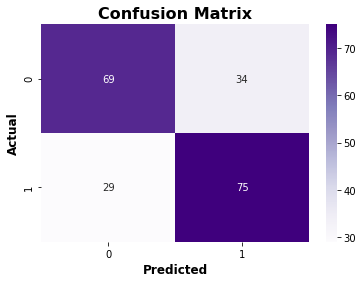

In [27]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, cmap='Purples')
plt.title('Confusion Matrix', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)
plt.show();

#### Evaluate DS Model

In [28]:
print('Accuracy - Test Set: ', metrics.accuracy_score(y_test, y_pred))

Accuracy - Test Set:  0.6956521739130435


In [29]:
print('Report \n', metrics.classification_report(y_test, y_pred))

Report 
               precision    recall  f1-score   support

           0       0.70      0.67      0.69       103
           1       0.69      0.72      0.70       104

    accuracy                           0.70       207
   macro avg       0.70      0.70      0.70       207
weighted avg       0.70      0.70      0.70       207



-------------------------------------------------------------------------------------------------------------------------------
**Rispondere alle seguenti domande per iscritto, giustificandole attraverso l'osservazione superficiale del dataset**

- E possibile prevedere se un dipendente di una compagnia tech abbia o meno una malattia mentale in base alle caratteristiche presenti nel set di dati (link in basso) attraverso un modello di machine learning? **Sì, abbiamo abbastanza features a disposizione** 

- In caso affermativo, che tipo di problema sarebbe: regressione o classificazione? **Classificazione**

- Inoltre, quale potrebbe essere la colonna target in questo caso? 
 **La colonna Treatment**
